In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load the Dataset
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# data preprocessing...
df= df.drop_duplicates()

# Features and target
X = df.drop(columns=['Class'])  # Class = 1 if fraud
y = df['Class']

# Scale
scaler = StandardScaler()
scaled = scaler.fit_transform(X[['Amount', 'Time']])

# Convert back to DataFrame
X[['Amount', 'Time']] = pd.DataFrame(scaled, columns=['Amount', 'Time'], index=X.index)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)










Class Distribution:
Class
0    283253
1       473
Name: count, dtype: int64

Class Distribution (%):
Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


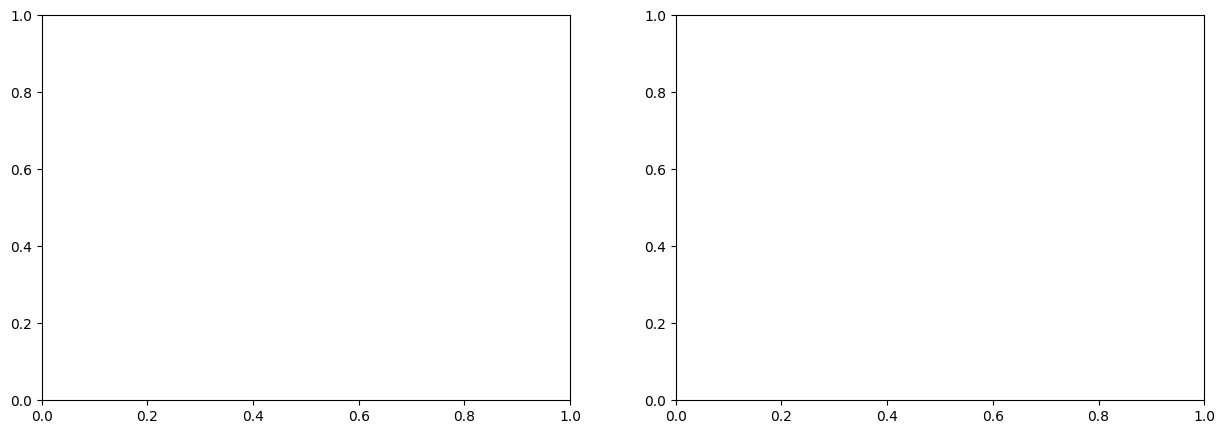

In [ ]:
#EDA
# Class distribution
print("Class Distribution:")
print(df['Class'].value_counts())
print("\nClass Distribution (%):")
print(df['Class'].value_counts(normalize=True) * 100)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))


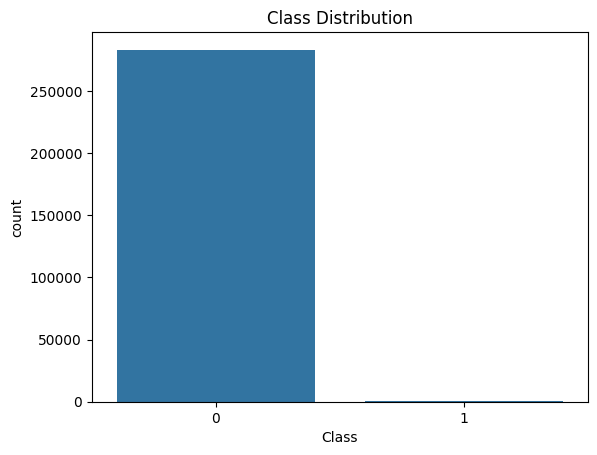

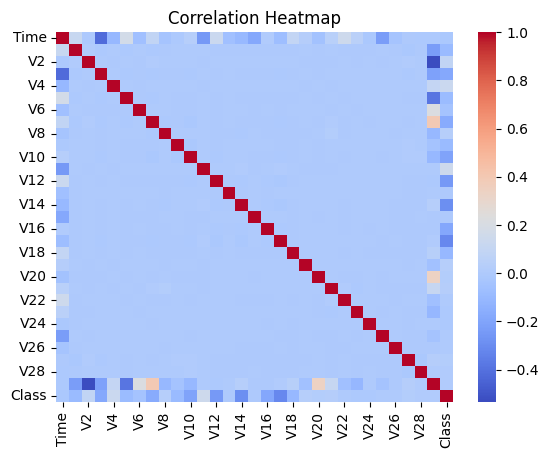

In [ ]:
# Count plot
sns.countplot(data=df, x='Class')
plt.title("Class Distribution")
plt.show()

sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/1

In [ ]:
from pycaret.classification import *

In [ ]:
df_sample = df.groupby('Class', group_keys=False).apply(lambda x: x.sample(frac=0.2))
print(f"Using a sample of {len(df_sample)} rows.")

Using a sample of 56746 rows.


In [ ]:
print("Setting up PyCaret environment...")
clf_setup = setup(data=df_sample,
                  target='Class',
                  normalize=True,           # Scales all numeric features
                  fix_imbalance=True,       # Uses SMOTE to handle imbalance
                  session_id=123)              # For reproducibility
print("✅ PyCaret setup complete.")

Setting up PyCaret environment...


,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(56746, 31)"
4,Transformed data shape,"(96336, 31)"
5,Transformed train set shape,"(79312, 31)"
6,Transformed test set shape,"(17024, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


✅ PyCaret setup complete.


In [ ]:
print("\nComparing models...")
best_model = compare_models(sort='F1',fold=3) # Sorting by F1 is better for imbalanced data
print("\nBest model found:")
print(best_model)

# Finalize the model
print("\nFinalizing the model...")
final_model = finalize_model(best_model)
print("✅ Model finalized.")
print(final_model)


Comparing models...


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9995,0.9910,0.8333,0.8931,0.8601,0.8599,0.8614,2.7867
xgboost,Extreme Gradient Boosting,0.9995,0.9864,0.8636,0.8334,0.8459,0.8456,0.8470,1.3600
rf,Random Forest Classifier,0.9994,0.9836,0.7879,0.8716,0.8267,0.8264,0.8279,22.4267
ada,Ada Boost Classifier,0.9993,0.9896,0.8333,0.7598,0.7927,0.7924,0.7943,16.4567
gbc,Gradient Boosting Classifier,0.9992,0.9292,0.7879,0.7318,0.7570,0.7565,0.7580,82.5533
lightgbm,Light Gradient Boosting Machine,0.9992,0.9405,0.6970,0.7874,0.7370,0.7366,0.7392,2.6200
knn,K Neighbors Classifier,0.9988,0.9088,0.8030,0.5953,0.6817,0.6811,0.6898,10.3367
dt,Decision Tree Classifier,0.9988,0.8254,0.6515,0.6354,0.6332,0.6325,0.6377,2.9500
svm,SVM - Linear Kernel,0.9972,0.9970,0.9242,0.4004,0.5454,0.5443,0.5989,0.2833
lr,Logistic Regression,0.9971,0.9951,0.9394,0.3612,0.5194,0.5182,0.5799,3.3100


Processing:   0%|          | 0/65 [00:00<?, ?it/s]


Best model found:
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

Finalizing the model...
✅ Model finalized.
Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Time', 'V1', 'V2', 'V3', 'V4',
                                             'V5', 'V6', 'V7', 'V8', 'V9',
                                             'V10', 'V11', 'V12', 'V13', 'V14',
                                             'V15', 'V

In [ ]:
# Save the entire pipeline (model + all transformations) to a file
save_model(final_model, 'creditcard_pipeline')
print("\n✅ Pipeline saved as creditcard_pipeline.pkl")
print("\nNow, download the 'creditcard_pipeline.pkl' file from the Colab file browser.")


Transformation Pipeline and Model Successfully Saved

✅ Pipeline saved as creditcard_pipeline.pkl

Now, download the 'creditcard_pipeline.pkl' file from the Colab file browser.
